 
Consider a color image, given by its red, green, blue components R, G, B. We present some 
methods for converting the color image to grayscale. Implement all these methods. 
(http://www.tannerhelland.com/3643/grayscale-image-algorithm-vb6/)


 
1. Simple averaging 
 
Gray = (R + G + B) / 3
 
It is better to use the formula R/3+G/3+B/3 (explain why? and implement both formulae).

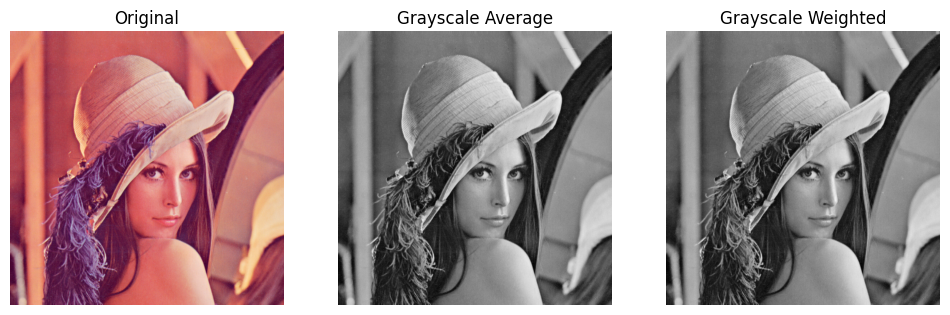

In [2]:
import numpy as np
import cv2
from pathlib import Path
import matplotlib.pyplot as plt


def grayscale_average(img):
    # (R + G + B) / 3
    return np.mean(img, axis=2).astype(np.uint8)

def grayscale_weighted(img):
    # R/3 + G/3 + B/3
    return ((img[:,:,0]/3) + (img[:,:,1]/3) + (img[:,:,2]/3)).astype(np.uint8)

# and test it
img = cv2.imread("lena.tif")
gray_avg = grayscale_average(img)
gray_weighted = grayscale_weighted(img)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 3, 2)
plt.title("Grayscale Average")
plt.imshow(gray_avg, cmap='gray')
plt.axis("off")
plt.subplot(1, 3, 3)
plt.title("Grayscale Weighted")
plt.imshow(gray_weighted, cmap='gray')
plt.axis("off")
plt.show()

#!/usr/bin/env python3

### 2. Weighted average

\[
Gray = 0.3R + 0.59G + 0.11B
\]

or

\[
Gray = 0.2126R + 0.7152G + 0.0722B
\]

or

\[
Gray = 0.299R + 0.587G + 0.114B
\]

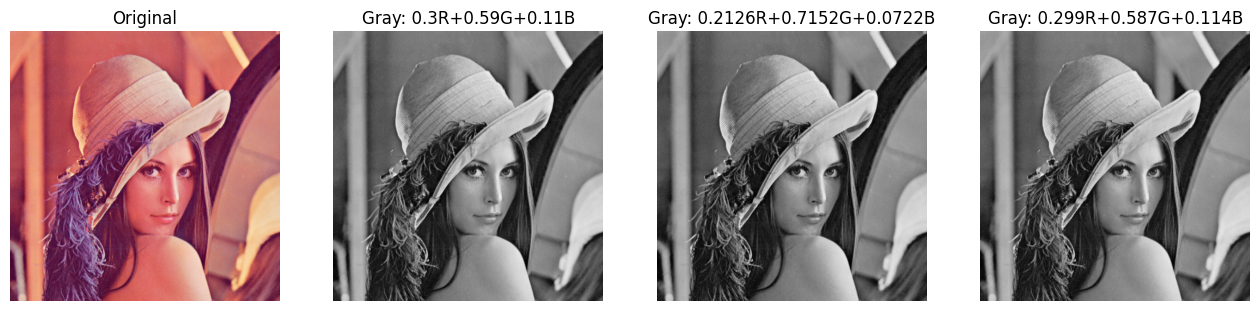

In [3]:
def grayscale_weighted_average(img, weights):
    """
    Convert RGB image to grayscale using custom weights.
    Args:
        img: numpy.ndarray, shape (H, W, 3)
        weights: tuple/list of 3 floats (R, G, B)
    Returns:
        Grayscale image as numpy.ndarray, shape (H, W)
    """
    # OpenCV uses BGR order
    B, G, R = img[:,:,0], img[:,:,1], img[:,:,2]
    gray = (weights[0]*R + weights[1]*G + weights[2]*B).astype(np.uint8)
    return gray

# Apply all three weighted averages
gray_1 = grayscale_weighted_average(img, (0.3, 0.59, 0.11))
gray_2 = grayscale_weighted_average(img, (0.2126, 0.7152, 0.0722))
gray_3 = grayscale_weighted_average(img, (0.299, 0.587, 0.114))

plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 4, 2)
plt.title("Gray: 0.3R+0.59G+0.11B")
plt.imshow(gray_1, cmap='gray')
plt.axis("off")
plt.subplot(1, 4, 3)
plt.title("Gray: 0.2126R+0.7152G+0.0722B")
plt.imshow(gray_2, cmap='gray')
plt.axis("off")
plt.subplot(1, 4, 4)
plt.title("Gray: 0.299R+0.587G+0.114B")
plt.imshow(gray_3, cmap='gray')
plt.axis("off")
plt.show()

### 3. Desaturation

In the HSI color model, **S** is the saturation component of the color.  
Saturation describes the intensity (purity) of that hue.  
When color is fully saturated, the color is considered in its purest (truest) version.  
Primary colors — red, blue, or yellow — are considered the truest versions as they are fully saturated.

Desaturating an image means setting the **S** component to 0.  
This can be done by averaging the minimum and maximum values of **R**, **G**, and **B**:

\[
Gray = \frac{ \min(R,G,B) + \max(R,G,B) }{2}
\]

---

### 4. Decomposition

- **Maximum:**  
  \[
  Gray = \max(R,G,B)
  \]

- **Minimum:**  
  \[
  Gray = \min(R,G,B)
  \]

---

### 5. Single colour channel

\[
Gray = R
\]

or

\[
Gray = G
\]

or

\[
Gray = B
\]


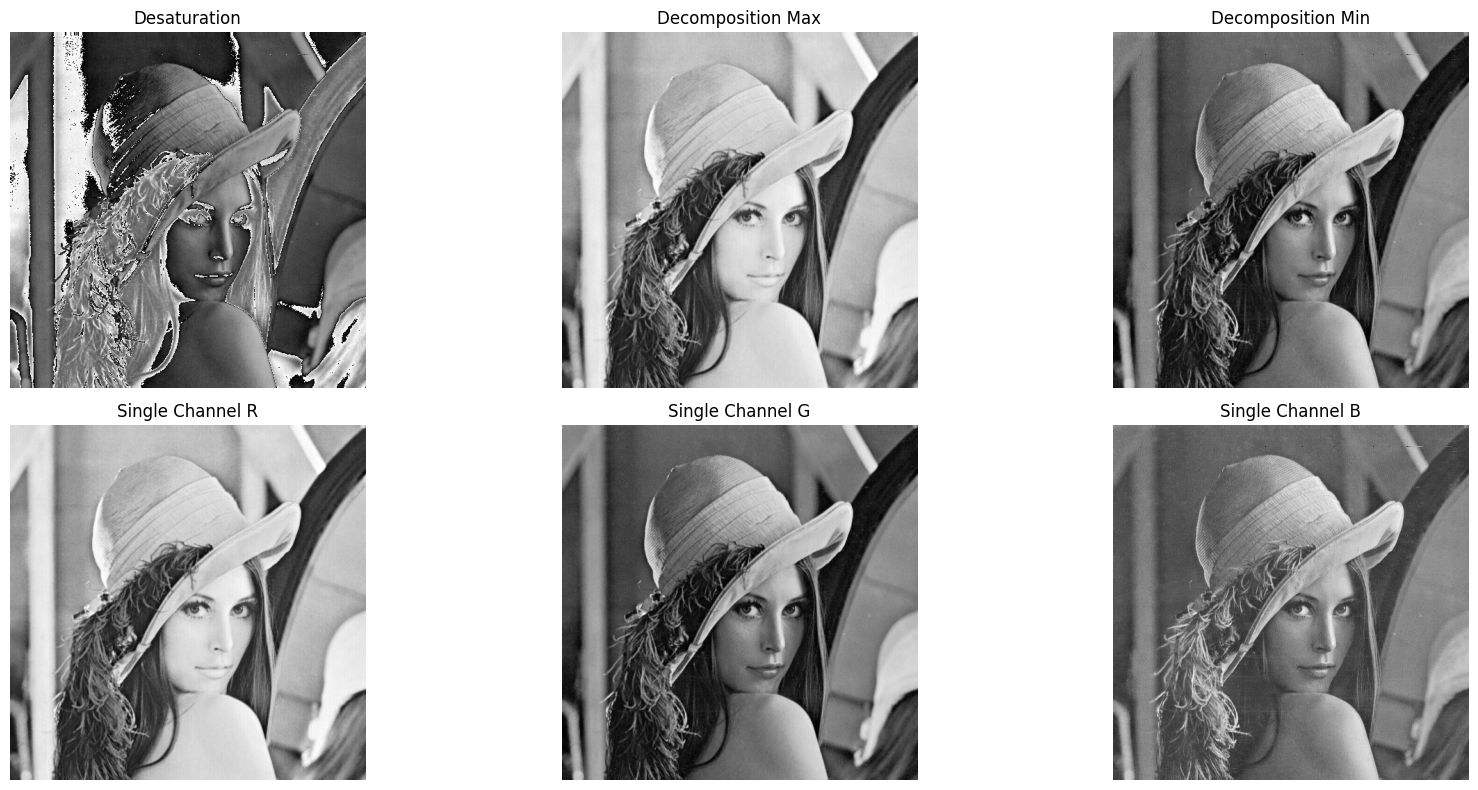

In [4]:
def grayscale_desaturation(img):
    # OpenCV uses BGR order
    B, G, R = img[:,:,0], img[:,:,1], img[:,:,2]
    min_rgb = np.minimum(np.minimum(R, G), B)
    max_rgb = np.maximum(np.maximum(R, G), B)
    gray = ((min_rgb + max_rgb) / 2).astype(np.uint8)
    return gray

def grayscale_decomposition_max(img):
    B, G, R = img[:,:,0], img[:,:,1], img[:,:,2]
    return np.maximum(np.maximum(R, G), B).astype(np.uint8)

def grayscale_decomposition_min(img):
    B, G, R = img[:,:,0], img[:,:,1], img[:,:,2]
    return np.minimum(np.minimum(R, G), B).astype(np.uint8)

def grayscale_single_channel(img, channel='R'):
    # channel: 'R', 'G', or 'B'
    idx = {'B': 0, 'G': 1, 'R': 2}[channel]
    return img[:,:,idx]

gray_desaturation = grayscale_desaturation(img)
gray_max = grayscale_decomposition_max(img)
gray_min = grayscale_decomposition_min(img)
gray_r = grayscale_single_channel(img, 'R')
gray_g = grayscale_single_channel(img, 'G')
gray_b = grayscale_single_channel(img, 'B')

plt.figure(figsize=(18, 8))
plt.subplot(2, 3, 1)
plt.title("Desaturation")
plt.imshow(gray_desaturation, cmap='gray')
plt.axis("off")
plt.subplot(2, 3, 2)
plt.title("Decomposition Max")
plt.imshow(gray_max, cmap='gray')
plt.axis("off")
plt.subplot(2, 3, 3)
plt.title("Decomposition Min")
plt.imshow(gray_min, cmap='gray')
plt.axis("off")
plt.subplot(2, 3, 4)
plt.title("Single Channel R")
plt.imshow(gray_r, cmap='gray')
plt.axis("off")
plt.subplot(2, 3, 5)
plt.title("Single Channel G")
plt.imshow(gray_g, cmap='gray')
plt.axis("off")
plt.subplot(2, 3, 6)
plt.title("Single Channel B")
plt.imshow(gray_b, cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.show()

### 6. Custom number of grey shades

Usually, a grayscale image has intensities that range between **0** and **255**.  
If one wants to reduce the number of shades, one can divide the interval \([0, 255]\) into a number of subintervals equal to the number of grey shades we want to use.

Let \( p < 256 \) be the number of shades we want to use.  
We consider the intervals:

\[
[a_0 = 0, a_1], [a_1, a_2], \ldots, [a_{p-1}, a_p = 255]
\]

All the pixels with intensities in interval \([a_{i-1}, a_i]\) will be set to a common value  
(for example, the average value of the pixels with intensities in that interval).

If we have a colour image, first compute one of the **weighted averages** of the colour components (see Section 2), and then apply the above described algorithm.

Generate the numbers \(\{a_i; i = 1, \ldots, p\}\) randomly,  
\(a_0 = 0 < a_1 < a_2 < \ldots < a_p = 255\),  
and such that all the intervals have the same length:

\[
a_i - a_{i-1} = \frac{255}{p}
\]


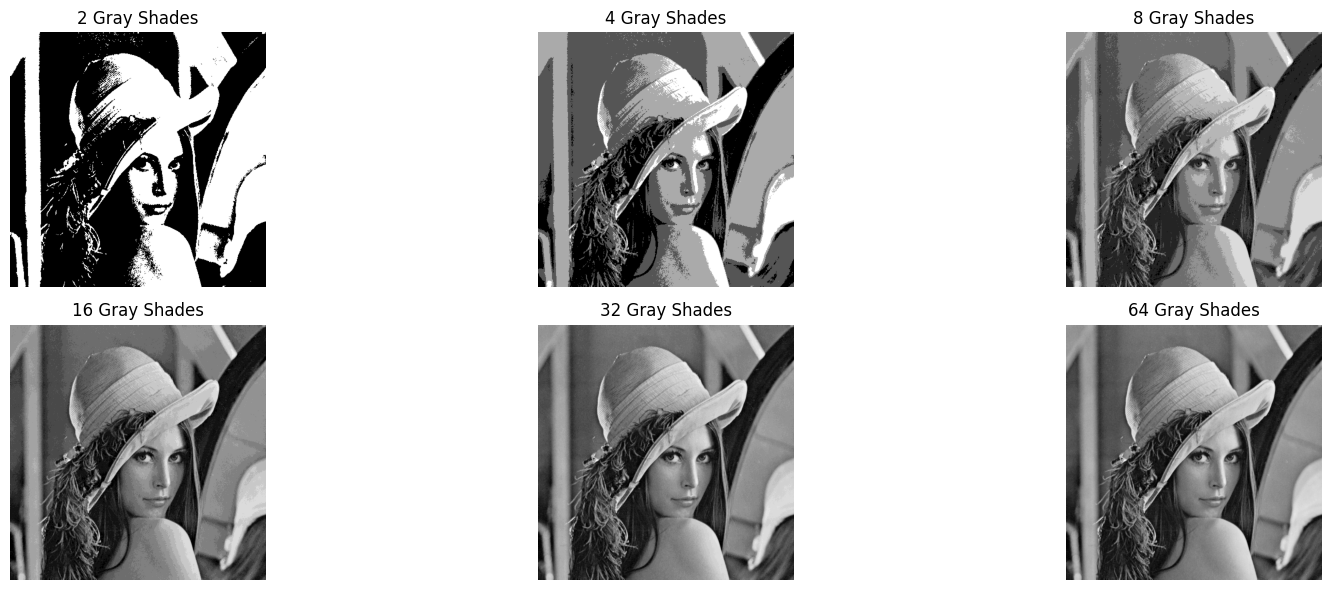

In [5]:
def reduce_gray_shades(gray_img, p):
    """
    Reduce the number of gray shades in a grayscale image.
    Args:
        gray_img: numpy.ndarray, shape (H, W), dtype=uint8
        p: int, number of gray shades (p < 256)
    Returns:
        numpy.ndarray, shape (H, W), dtype=uint8
    """
    # Compute interval length
    interval = 255 / p
    # Generate interval boundaries
    a = np.linspace(0, 255, p+1)
    # Assign each pixel to the nearest shade (use midpoints)
    shade_values = ((a[:-1] + a[1:]) / 2).astype(np.uint8)
    indices = np.floor(gray_img / interval).astype(int)
    indices = np.clip(indices, 0, p-1)
    return shade_values[indices]

# Example usage:
# for multiple p values
plt.figure(figsize=(18, 6))
for i, p in enumerate([2, 4, 8, 16, 32, 64], 1):
    gray_custom_shades = reduce_gray_shades(gray_2, p)
    plt.subplot(2, 3, i)
    plt.title(f"{p} Gray Shades")
    plt.imshow(gray_custom_shades, cmap='gray')
    plt.axis("off")
plt.tight_layout()
plt.show()

### 7. Custom number of grey shades with error-diffusion dithering

**Image dithering:**  
[http://www.tannerhelland.com/4660/dithering-eleven-algorithms-source-code/](http://www.tannerhelland.com/4660/dithering-eleven-algorithms-source-code/)  

Implement both the **Floyd–Steinberg** and **Burkes Dithering** algorithms.

---

We explain error diffusion using an example.  
Consider transforming a grayscale image into a binary one.  
The first pixel in the image is dark gray (e.g., intensity = 65).  
Since 65 is closer to 0 (black) than 255 (white), the pixel is set to black.  

Error diffusion works by spreading the *error* of each conversion to neighboring unvisited pixels.  
If the next pixel has an intensity of 85, the algorithm adds part of the previous error (65) before deciding.  
This causes pixels to collectively approximate the tone, producing the illusion of gray through black-and-white patterns.

---

#### Floyd–Steinberg diffusion mask

\[
\begin{bmatrix}
 & & \frac{7}{16} \\
 \frac{3}{16} & \frac{5}{16} & \frac{1}{16}
\end{bmatrix}
\]

\* marks the current pixel position.  
Error is diffused only to pixels that have not yet been processed.

---

#### Burkes diffusion mask

\[
\frac{1}{32}
\begin{bmatrix}
 & & * & * & 8 & 4 \\
 2 & 4 & 8 & 4 & 2
\end{bmatrix}
\]

---

#### Basic Floyd–Steinberg dithering algorithm

\[
\begin{aligned}
I &= \text{Input Image} \\
\text{OutputImage} &= 0 \\
\text{for } i = 1 \text{ to } m &: \\
\quad \text{for } j = 1 \text{ to } n &: \\
\quad\quad \text{OutputImage}[i,j] = \text{NearestColor}(I[i,j]) \\
\quad\quad err = I[i,j] - \text{OutputImage}[i,j] \\
\quad\quad I[i, j+1] += err \times \frac{7}{16} \\
\quad\quad I[i+1, j-1] += err \times \frac{3}{16} \\
\quad\quad I[i+1, j] += err \times \frac{5}{16} \\
\quad\quad I[i+1, j+1] += err \times \frac{1}{16} \\
\quad \text{end for} \\
\text{end for}
\end{aligned}
\]


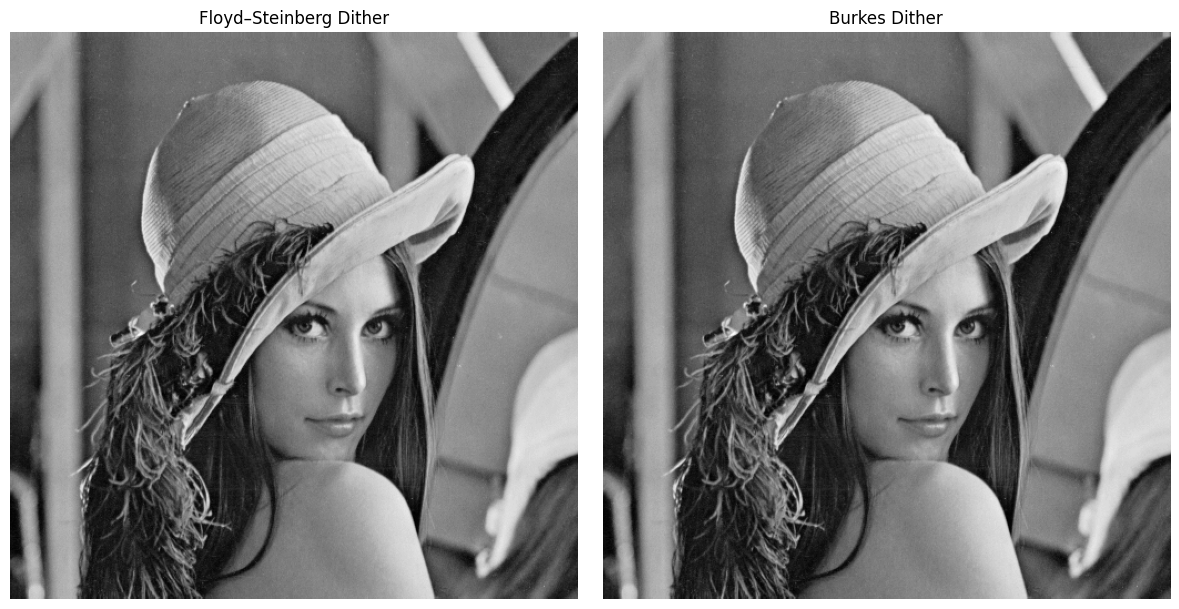

In [6]:
def nearest_gray_shade(val, p):
    """
    Find the nearest gray shade for a given value, given p shades.
    """
    interval = 255 / p
    idx = int(np.floor(val / interval))
    idx = np.clip(idx, 0, p-1)
    # Midpoint of interval
    a = np.linspace(0, 255, p+1)
    shade = (a[idx] + a[idx+1]) / 2
    return np.uint8(shade)

def floyd_steinberg_dither(gray_img, p):
    """
    Floyd–Steinberg error-diffusion dithering for custom gray shades.
    """
    img = gray_img.astype(np.float32).copy()
    out = np.zeros_like(gray_img, dtype=np.uint8)
    h, w = img.shape
    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x]
            new_pixel = nearest_gray_shade(old_pixel, p)
            out[y, x] = new_pixel
            err = old_pixel - new_pixel
            if x+1 < w:
                img[y, x+1] += err * 7/16
            if y+1 < h and x > 0:
                img[y+1, x-1] += err * 3/16
            if y+1 < h:
                img[y+1, x] += err * 5/16
            if y+1 < h and x+1 < w:
                img[y+1, x+1] += err * 1/16
    return out

def burkes_dither(gray_img, p):
    """
    Burkes error-diffusion dithering for custom gray shades.
    """
    img = gray_img.astype(np.float32).copy()
    out = np.zeros_like(gray_img, dtype=np.uint8)
    h, w = img.shape
    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x]
            new_pixel = nearest_gray_shade(old_pixel, p)
            out[y, x] = new_pixel
            err = old_pixel - new_pixel
            # Right neighbors
            if x+1 < w:
                img[y, x+1] += err * 8/32
            if x+2 < w:
                img[y, x+2] += err * 4/32
            # Next row neighbors
            if y+1 < h:
                if x-2 >= 0:
                    img[y+1, x-2] += err * 2/32
                if x-1 >= 0:
                    img[y+1, x-1] += err * 4/32
                img[y+1, x] += err * 8/32
                if x+1 < w:
                    img[y+1, x+1] += err * 4/32
                if x+2 < w:
                    img[y+1, x+2] += err * 2/32
    return out

# Example usage:
gray_fs_dither = floyd_steinberg_dither(gray_2, p)
gray_burkes_dither = burkes_dither(gray_2, p)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Floyd–Steinberg Dither")
plt.imshow(gray_fs_dither, cmap='gray')
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Burkes Dither")
plt.imshow(gray_burkes_dither, cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.show()

 What about the “inverse” problem: grayscale to RGB?  
 
Try to find a very simple method that transforms a grayscale image (a medical image, for 
example) in a colour one (don’t consider the ‘making sense’ problem).  

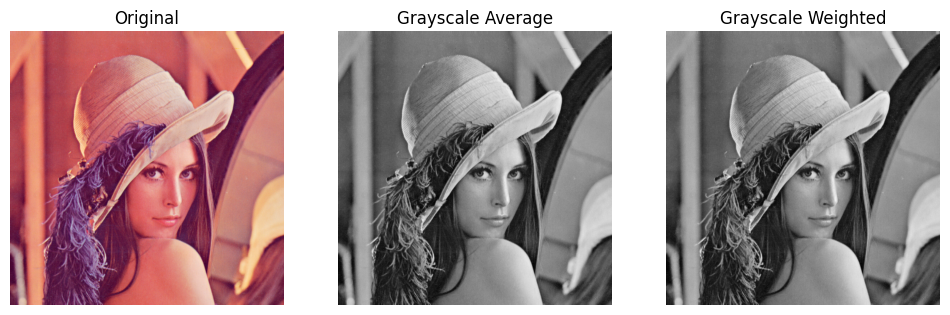

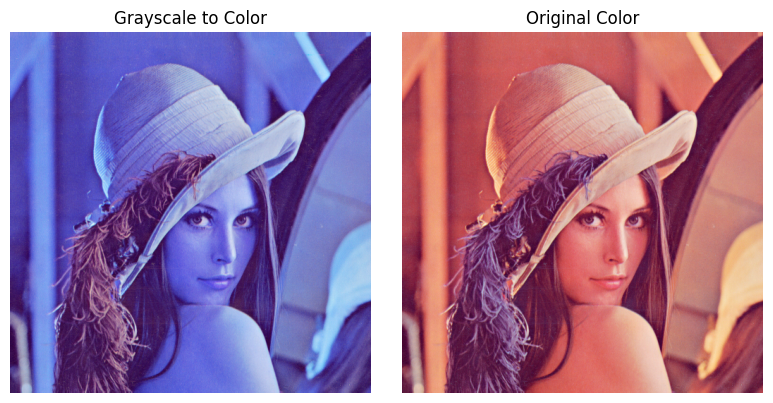

In [8]:
import numpy as np
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
def grayscale_average(img):
    # (R + G + B) / 3
    return np.mean(img, axis=2).astype(np.uint8)
def grayscale_weighted(img):
    # R/3 + G/3 + B/3
    return ((img[:,:,0]/3) + (img[:,:,1]/3) + (img[:,:,2]/3)).astype(np.uint8)
# and test it
img = cv2.imread("lena.tif")
gray_avg = grayscale_average(img)
gray_weighted = grayscale_weighted(img)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 3, 2)
plt.title("Grayscale Average")
plt.imshow(gray_avg, cmap='gray')
plt.axis("off")
plt.subplot(1, 3, 3)
plt.title("Grayscale Weighted")
plt.imshow(gray_weighted, cmap='gray')
plt.axis("off")
plt.show()

#now try to bring it back to color
def grayscale_to_color(gray_img, color_img):
    """
    Convert a grayscale image back to a color image using the color information
    from a reference color image.
    Args:
        gray_img: numpy.ndarray, shape (H, W), dtype=uint8
        color_img: numpy.ndarray, shape (H, W, 3), dtype=uint8
    Returns:
        numpy.ndarray, shape (H, W, 3), dtype=uint8
    """
    # Normalize grayscale image to [0, 1]
    gray_norm = gray_img.astype(np.float32) / 255.0
    # Convert color image to float32
    color_float = color_img.astype(np.float32) / 255.0
    # Compute the intensity of the color image
    intensity = np.mean(color_float, axis=2)
    # Avoid division by zero
    intensity[intensity == 0] = 1e-6
    # Compute the ratio of grayscale to intensity
    ratio = gray_norm / intensity
    # Scale the color channels by this ratio
    color_scaled = np.clip(color_float * ratio[:,:,np.newaxis], 0, 1)
    # Convert back to uint8
    return (color_scaled * 255).astype(np.uint8)
color_restored = grayscale_to_color(gray_avg, img)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Grayscale to Color")
plt.imshow(color_restored)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Original Color")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.tight_layout()
plt.show()

#!/usr/bin/env python3